In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

from metrics import auuc_score, get_metrics_table
from model_selection import treatment_control_split
from util import DataGenerator, create_score_tables

In [80]:
n_train = 20000
n_test = 20000

In [81]:
generator = DataGenerator()

In [82]:
y_train, t_train, X_train = generator.generate(n_train)
y_treatment, y_control, X_treatment, X_control = treatment_control_split(
    y_train,
    X_train,
    t_train
)

In [83]:
print(f"cvr(treatment): {y_treatment.count(True)/len(y_treatment)}")
print(f"cvr(control)  : {y_control.count(True)/len(y_control)}")

cvr(treatment): 0.03432584825403106
cvr(control)  : 0.034981296127792945


In [84]:
model_treatment = LogisticRegression(C=0.01)
model_treatment.fit(X_treatment, y_treatment)

LogisticRegression(C=0.01)

In [85]:
model_control = LogisticRegression(C=0.01)
model_control.fit(X_control, y_control)

LogisticRegression(C=0.01)

In [86]:
y_test, t_test, X_test = generator.generate(n_test, seed=42)

In [87]:
score_treatment = model_treatment.predict_proba(X_test)
score_control = model_control.predict_proba(X_test)

In [88]:
scores = score_treatment[:, 1] / score_control[:, 1]
df = create_score_tables(y_test, t_test, scores)

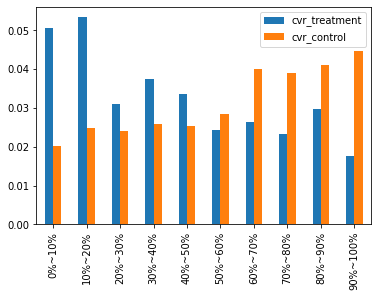

In [89]:
df.plot.bar()
plt.show()

In [90]:
auuc_df = get_metrics_table(y_test, t_test, scores)

In [91]:
auuc_df.shape

(20000, 11)

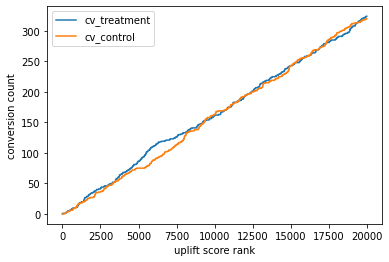

In [92]:
auuc_df.plot(y=["cv_treatment", "cv_control"])
plt.xlabel("uplift score rank")
plt.ylabel("conversion count")
plt.show()

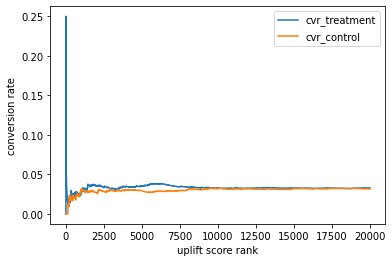

In [93]:
auuc_df.plot(y=["cvr_treatment", "cvr_control"])
plt.xlabel("uplift score rank")
plt.ylabel("conversion rate")
plt.show()

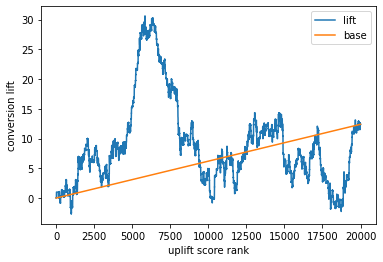

In [94]:
auuc_df.plot(y=["lift", "base"])
plt.xlabel("uplift score rank")
plt.ylabel("conversion lift")
plt.show()

In [95]:
auuc = auuc_score(auuc_df["lift"], auuc_df["base"])

In [96]:
auuc

2.680534052245907

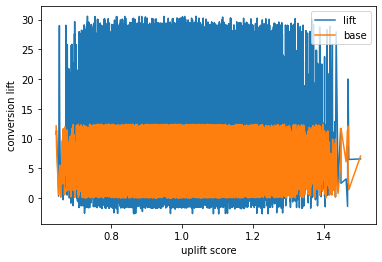

In [99]:
auuc_df.sort_values(by="score").plot(x="score", y=["lift", "base"])
plt.xlabel("uplift score")
plt.ylabel("conversion lift")
plt.show()

In [100]:
auuc_df

,conversion,treatment,score,n_treatment,n_control,cv_treatment,cv_control,cvr_treatment,cvr_control,lift,base
0,False,False,0.885014,0,1,0,0,0.000000,0.000000,0.000000,0.000000
1,False,False,0.964435,0,2,0,0,0.000000,0.000000,0.000000,0.000620
2,False,True,1.102619,1,2,0,0,0.000000,0.000000,0.000000,0.001240
3,False,False,1.185768,1,3,0,0,0.000000,0.000000,0.000000,0.001860
4,False,False,1.084061,1,4,0,0,0.000000,0.000000,0.000000,0.002480
...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,0.903046,9865,10131,324,320,0.032843,0.031586,12.401935,12.397176
19996,False,True,0.981325,9866,10131,324,320,0.032840,0.031586,12.370348,12.397796
19997,False,False,1.121827,9866,10132,324,320,0.032840,0.031583,12.401105,12.398416
19998,False,True,0.850037,9867,10132,324,320,0.032837,0.031583,12.369522,12.399036
